In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Dataset Files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Load Dataset
students_grades_df = pd.read_csv(
    'C:/Users/hp/Downloads/student-por.csv')

In [4]:
def create_average_column():
    columns = ['G1', 'G2', 'G3']
    students_grades_df['annual_grades_avg'] = students_grades_df[columns].mean(
        axis=1)
    

In [5]:
    create_average_column()

In [6]:
def five_level_classification():
    bins = pd.IntervalIndex.from_tuples(
        [(0, 9.5), (9.5, 11.5), (11.5, 13.5), (13.5, 15.5), (15.5, 20)], closed='right')

    levels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']

    new_column = 'annual_grades_evaluation'
    students_grades_df[new_column] = np.array(levels)[
        pd.cut(students_grades_df['annual_grades_avg'], bins=bins).cat.codes]

In [7]:
five_level_classification()

In [8]:
#initial Observation
print(f'data frame shape: {students_grades_df.shape}')

data frame shape: (649, 35)


In [9]:
students_grades_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg,annual_grades_evaluation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,sufficient
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,satisfactory


In [10]:
students_grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
school                      649 non-null object
sex                         649 non-null object
age                         649 non-null int64
address                     649 non-null object
famsize                     649 non-null object
Pstatus                     649 non-null object
Medu                        649 non-null int64
Fedu                        649 non-null int64
Mjob                        649 non-null object
Fjob                        649 non-null object
reason                      649 non-null object
guardian                    649 non-null object
traveltime                  649 non-null int64
studytime                   649 non-null int64
failures                    649 non-null int64
schoolsup                   649 non-null object
famsup                      649 non-null object
paid                        649 non-null object
activities                  649 non-n

In [11]:
students_grades_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667


In [12]:
#Correlation Analysis
#First lets see which types of correlations we have.

def plot_corr_map(data, **kwargs):

    _, ax = plt.subplots(figsize=(35, 35))
    sns.heatmap(data=data.corr(), ax=ax, **kwargs)
    ax.set_title('Correlation Heatmap')


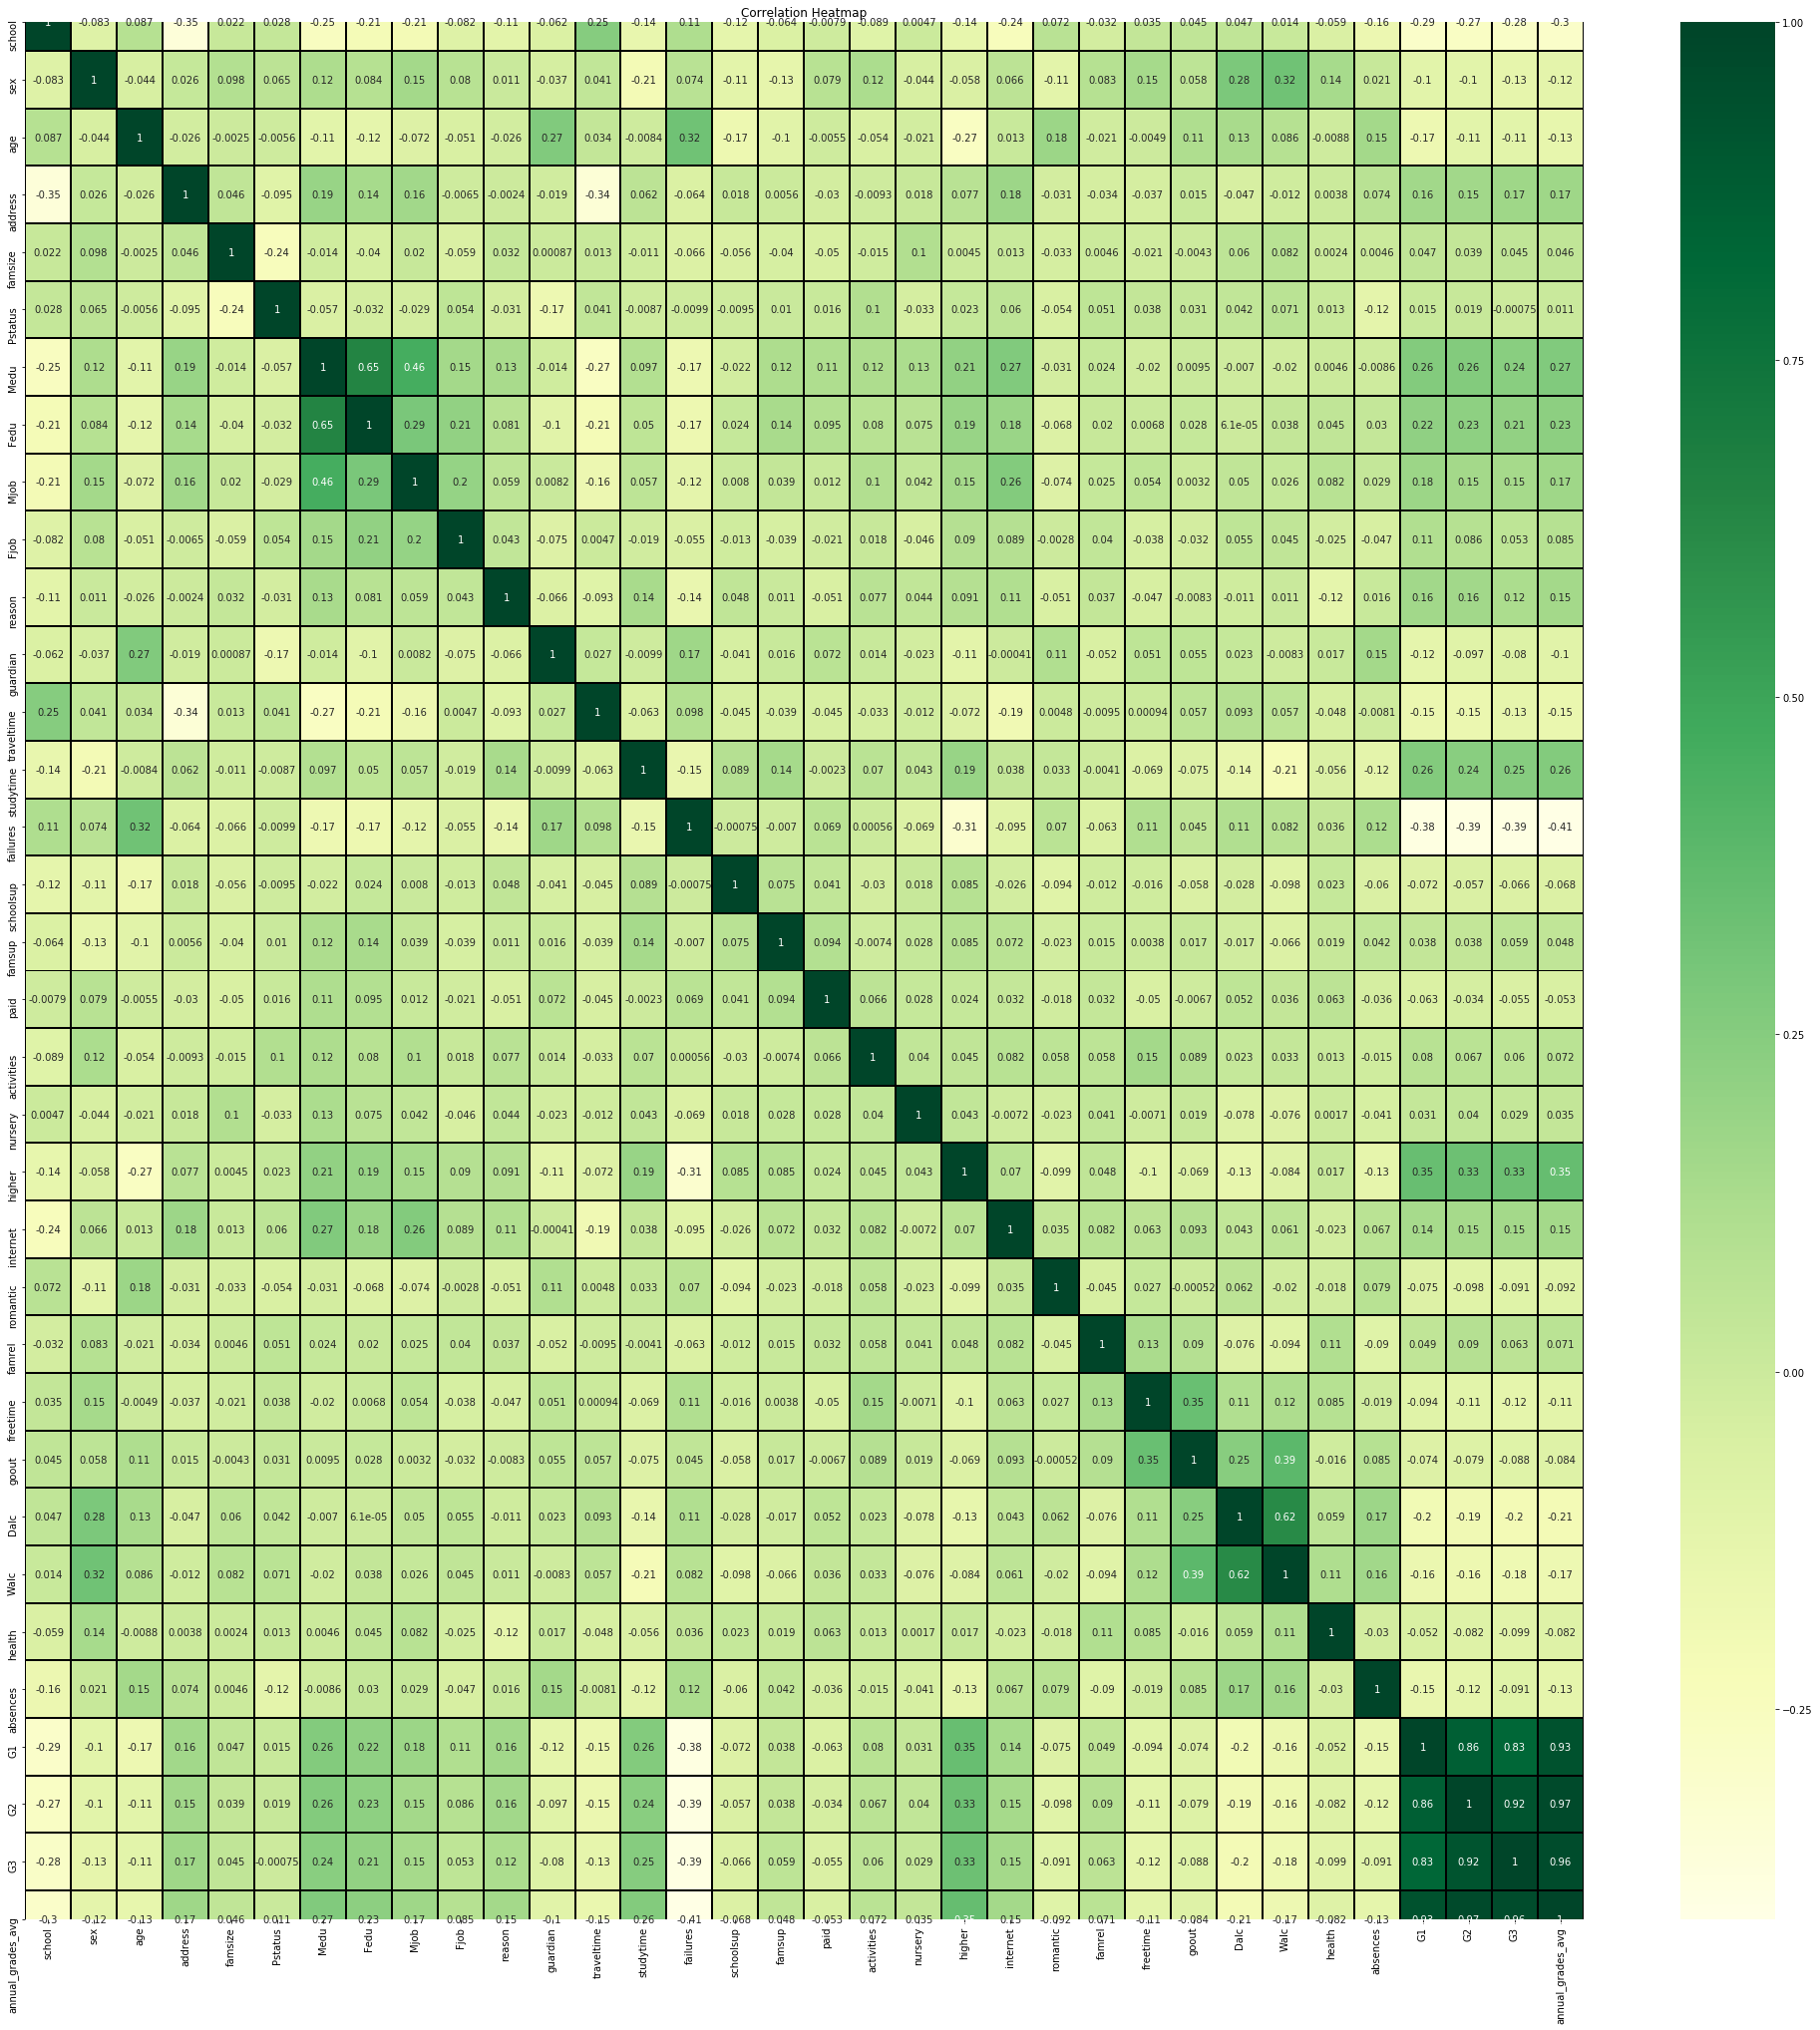

In [13]:
params = {'annot': True, 'fmt': '.2g', 'cmap': 'YlGn',
          'linewidths': 1, 'linecolor': 'black'}

# We need to encode the string nominal columns to numbers
encoded_df = students_grades_df.iloc[:, :-1].copy()
columns = encoded_df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
encoded_df[columns] = ordinal_encoder.fit_transform(encoded_df[columns])

plot_corr_map(encoded_df, **params)

In [14]:
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=students_grades_df,
                      x='annual_grades_evaluation', hue=column, ax=ax[0])

        sns.countplot(data=students_grades_df, x=column, ax=ax[1])

        sns.boxplot(data=students_grades_df, x=column,
                    y='annual_grades_avg', ax=ax[2])

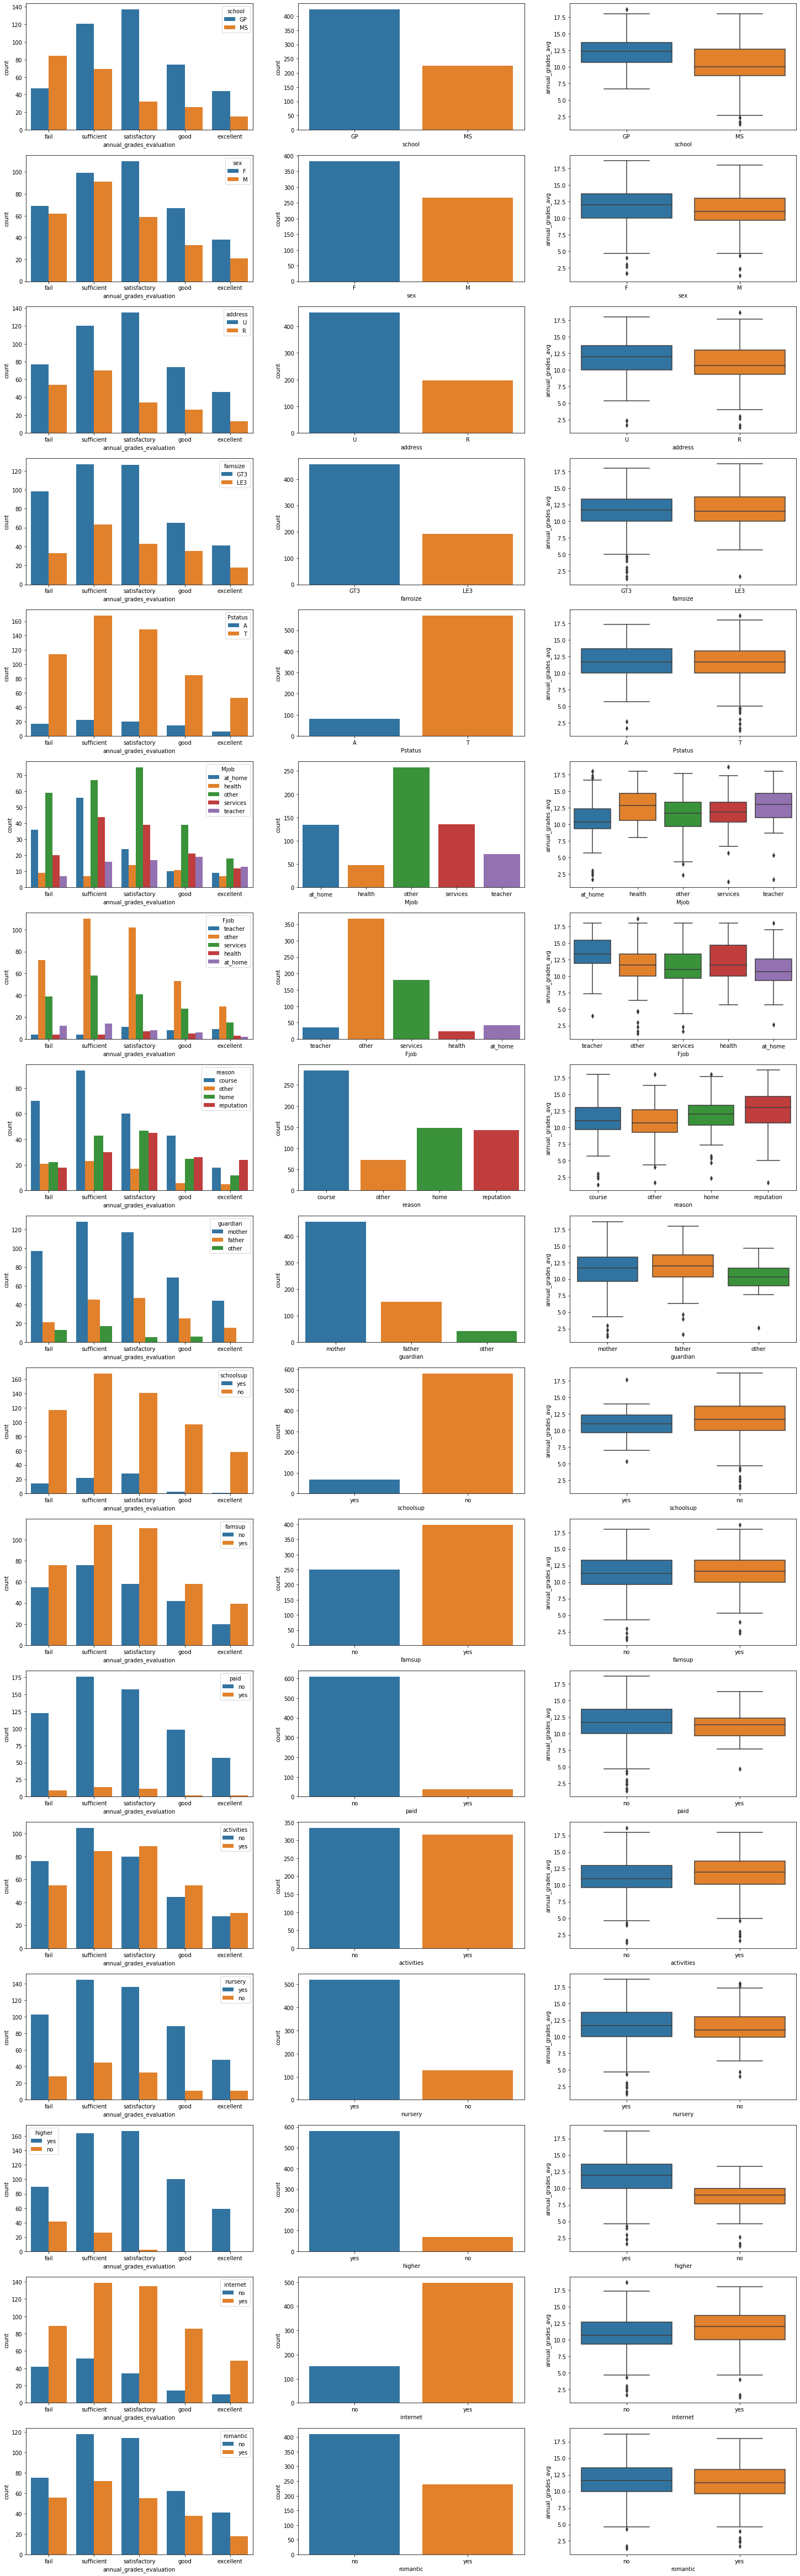

In [15]:
columns = students_grades_df.select_dtypes(include='object')
columns = columns.drop('annual_grades_evaluation', axis=1)
plot_categorical_insight(columns)

In [16]:
def plot_grades_to_self():
    nrows, ncols = 1, 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    sns.countplot(data=students_grades_df,
                  x='annual_grades_evaluation', ax=axes[0])

    sns.boxplot(data=students_grades_df,
                x='annual_grades_evaluation', y='annual_grades_avg', ax=axes[1])

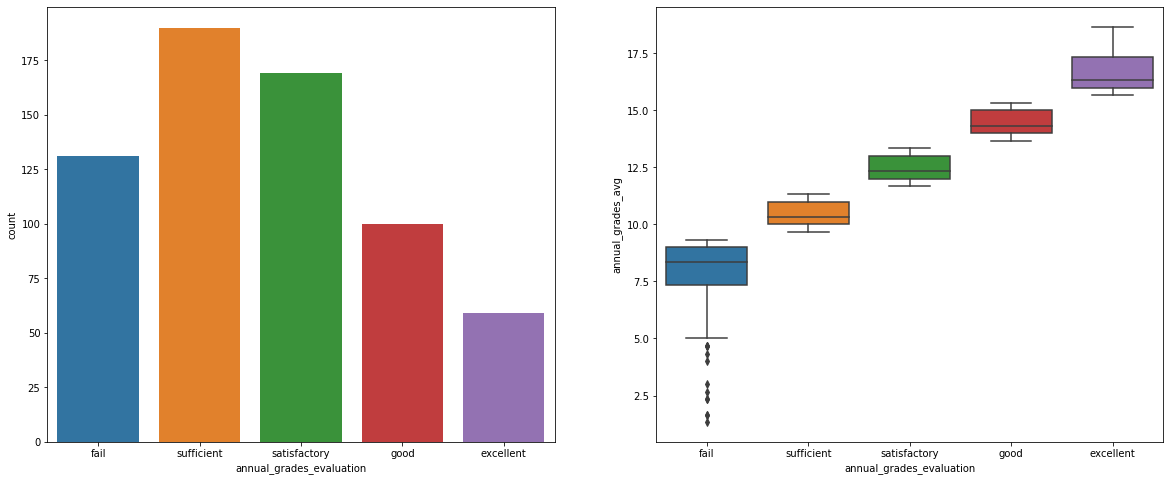

In [17]:
plot_grades_to_self()

In [18]:
sns.displot(data=students_grades_df['annual_grades_avg'],
            element='step', kde=True, color='green')

AttributeError: module 'seaborn' has no attribute 'displot'

In [19]:
#Classification Modeling
# Split dataset
X, y = students_grades_df.iloc[:, :-1], students_grades_df.iloc[:, -1]

In [20]:
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
#Data Scaling
# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns
    return binary_columns, nominal_columns, numerical_columns

In [22]:
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()

In [23]:
# Now we can create a column transformer pipeline
transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

In [24]:
# Starified k cross validation
Kfold = StratifiedKFold(n_splits=5)

In [26]:
RANDOM_STATE = 42
# I did tweak some of the hyperparameters with trial & error
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)]
               

In [27]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes'
                     ]

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]

In [29]:
def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)
        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores

In [30]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [31]:
def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [32]:
best_estimators = pick_best_estimator()

In [34]:
def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)
        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

In [35]:
scores = gather_metrics_scores()

In [36]:
def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

In [37]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

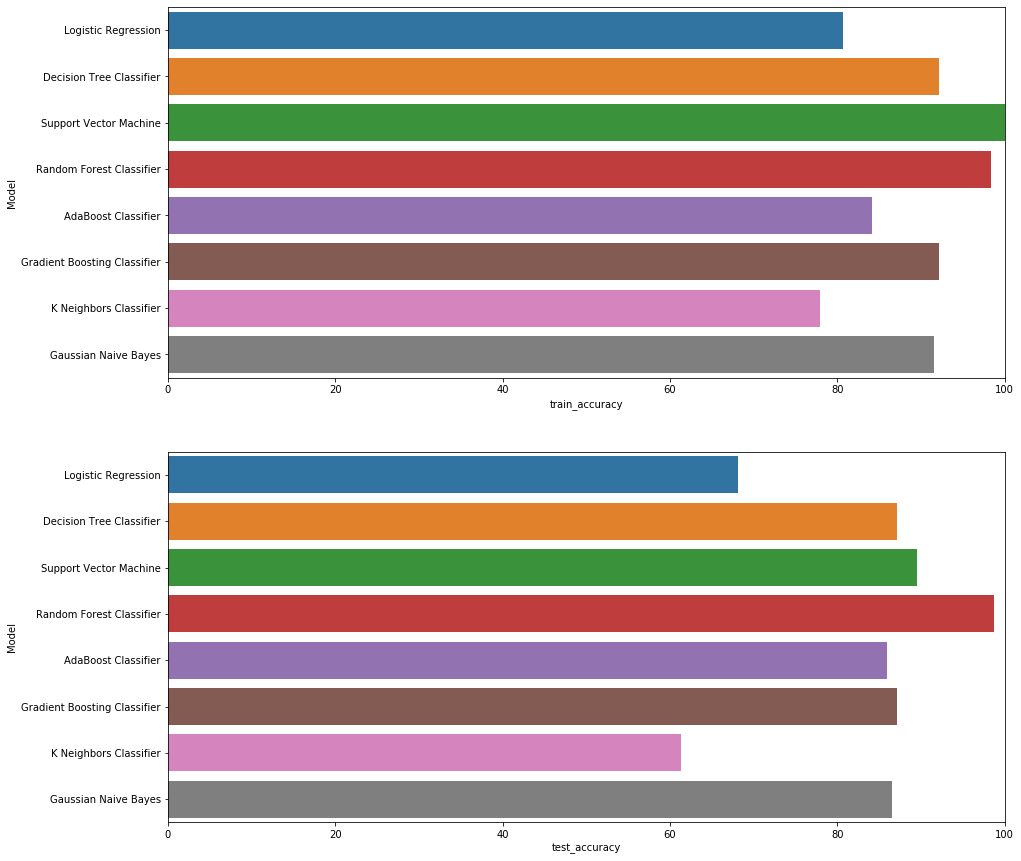

In [38]:
plot_train_test_accuracy(results_df)

In [39]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

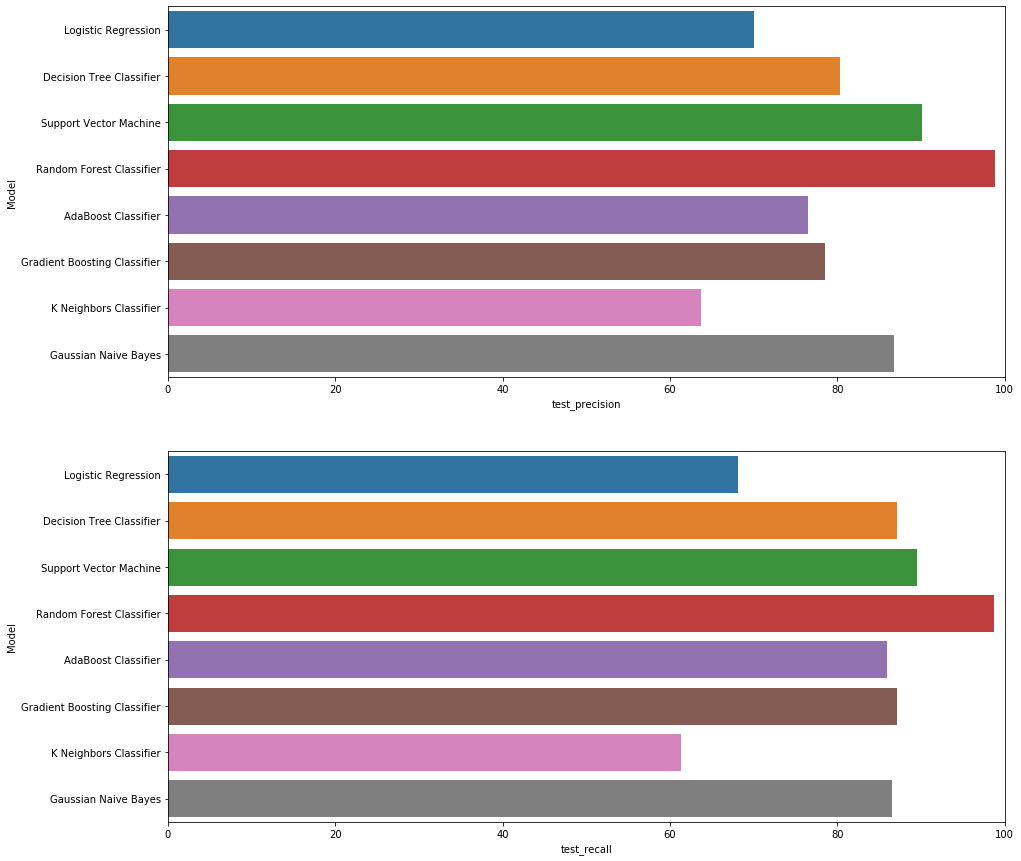

In [40]:
plot_precision_recall(results_df)